In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Improve plot resolution

# Load the dataset
# Please adjust the file_path to where you have saved the CSV file
file_path = '/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv' 
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please check the path.")
    # Create an empty DataFrame to prevent subsequent code from crashing
    df = pd.DataFrame()

if not df.empty:
    # 1. Display the first 5 rows to understand the structure
    print("\n--- 1. First 5 Rows of the Dataset ---")
    display(df.head())

    # 2. Get general information about the DataFrame (entry count, columns, non-null values, dtypes)
    print("\n\n--- 2. DataFrame General Information ---")
    df.info()

    # 3. Get descriptive statistics for numerical columns (in this case, 'label')
    print("\n\n--- 3. Descriptive Statistics ---")
    display(df.describe())

    # 4. Check for missing values in each column
    print("\n\n--- 4. Checking for Missing Values ---")
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("No missing values found in the dataset.")
    else:
        print(missing_values[missing_values > 0])


Dataset loaded successfully.

--- 1. First 5 Rows of the Dataset ---


,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False




--- 2. DataFrame General Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


--- 3. Descriptive Statistics ---


,label
count,44868.000000
mean,0.389966
std,0.487748
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000




--- 4. Checking for Missing Values ---
No missing values found in the dataset.


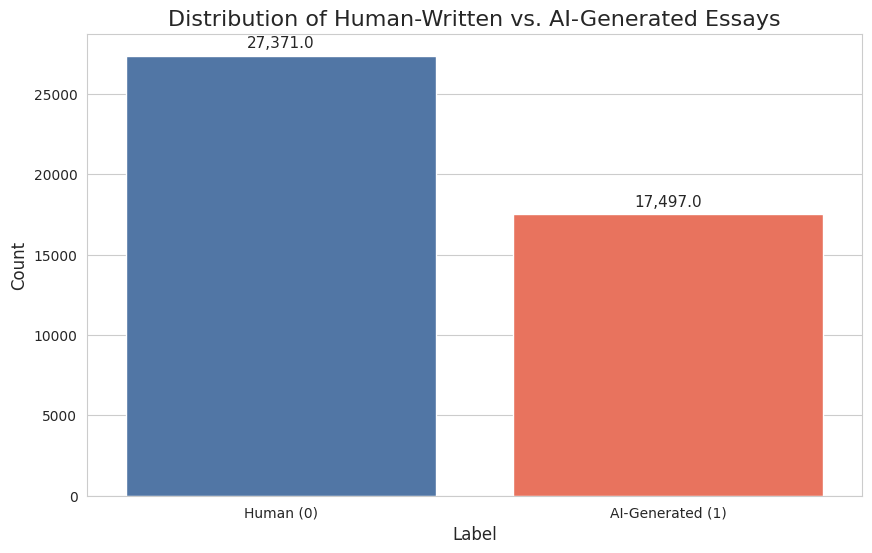


Percentage Distribution of Labels:
Human-written essays (0): 61.00%
AI-generated essays (1): 39.00%


In [2]:
if not df.empty:
    plt.figure(figsize=(10, 6))
    
    # Create a count plot for the label distribution
    ax = sns.countplot(x='label', data=df, palette=['#4374B3', '#FF6347'])
    
    plt.title('Distribution of Human-Written vs. AI-Generated Essays', fontsize=16)
    plt.xlabel('Label', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['Human (0)', 'AI-Generated (1)'])
    
    # Annotate the bars with the exact counts
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points',
                    fontsize=11)
    
    plt.show()

    # Calculate the percentage of each class
    label_counts_perc = df['label'].value_counts(normalize=True) * 100
    print("\nPercentage Distribution of Labels:")
    print(f"Human-written essays (0): {label_counts_perc[0]:.2f}%")
    print(f"AI-generated essays (1): {label_counts_perc[1]:.2f}%")


- we do not have many problems using this dataset in case of data imbalance. We do not need any kind of oversampling tech in this project(that what I think now, maybe later we fix that)

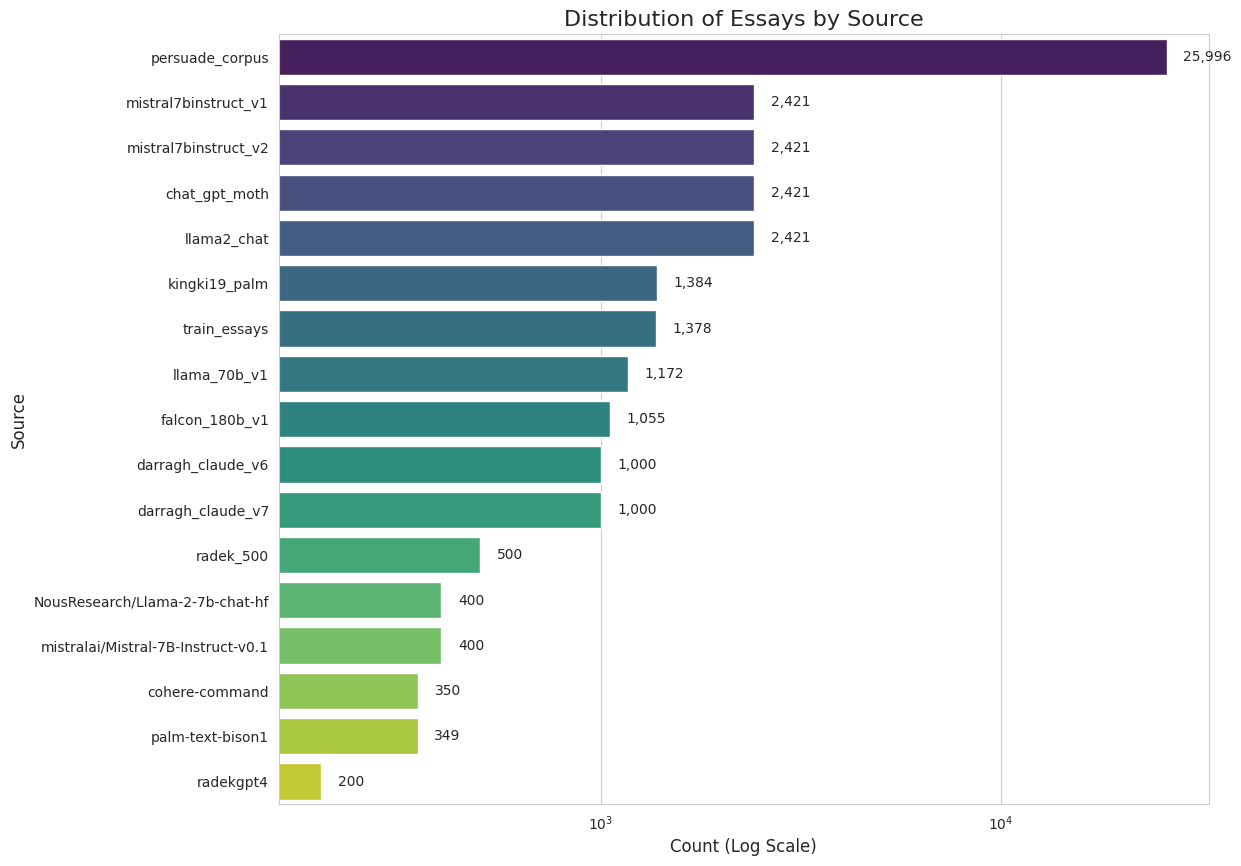


Essay Counts from Each Source:
source
persuade_corpus                       25996
mistral7binstruct_v1                   2421
mistral7binstruct_v2                   2421
chat_gpt_moth                          2421
llama2_chat                            2421
kingki19_palm                          1384
train_essays                           1378
llama_70b_v1                           1172
falcon_180b_v1                         1055
darragh_claude_v6                      1000
darragh_claude_v7                      1000
radek_500                               500
NousResearch/Llama-2-7b-chat-hf         400
mistralai/Mistral-7B-Instruct-v0.1      400
cohere-command                          350
palm-text-bison1                        349
radekgpt4                               200
Name: count, dtype: int64


In [3]:
if not df.empty:
    plt.figure(figsize=(12, 10))
    
    # Plot the distribution of data sources
    source_order = df['source'].value_counts().index
    ax = sns.countplot(y='source', data=df, order=source_order, palette='viridis')
    
    plt.title('Distribution of Essays by Source', fontsize=16)
    plt.xlabel('Count (Log Scale)', fontsize=12)
    plt.ylabel('Source', fontsize=12)
    plt.xscale('log') # Use a log scale due to the large variance in counts
    
    # Add count labels to the bars
    for i, (p, count) in enumerate(zip(ax.patches, df['source'].value_counts(sort=True))):
        ax.text(p.get_width() * 1.1, i, f'{count:,}', va='center')
        
    plt.show()

    print("\nEssay Counts from Each Source:")
    print(df['source'].value_counts())


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

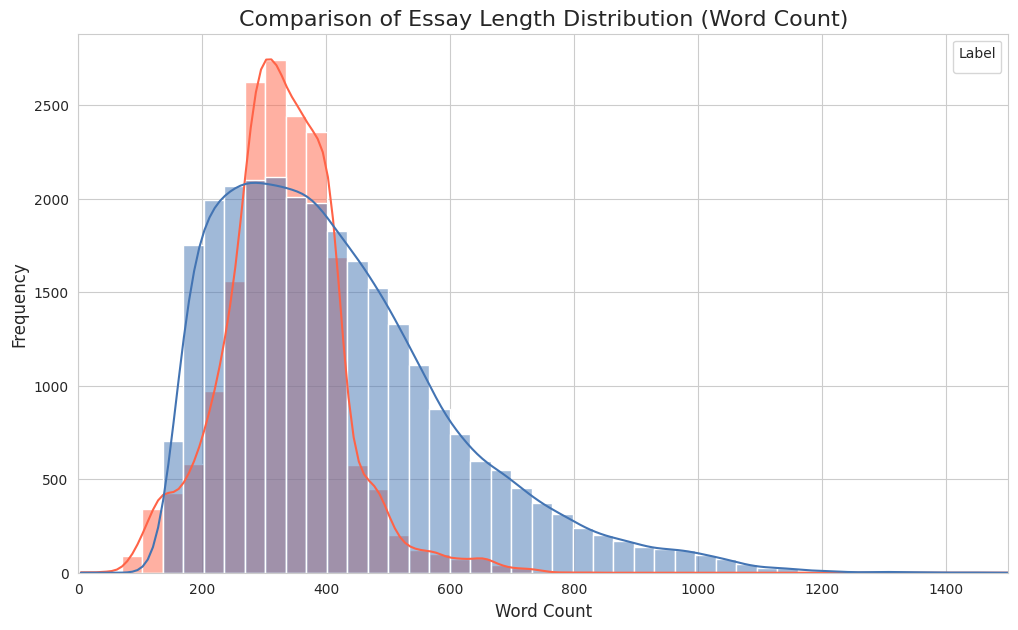


Descriptive Statistics for Word Count by Label:


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,27371.0,418.283146,189.285918,143.0,274.0,383.0,519.0,1656.0
1,17497.0,329.398983,94.256529,4.0,274.0,328.0,386.0,818.0


In [4]:
if not df.empty:
    # Calculate word count for each essay
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(12, 7))
    
    # Plot the distribution of word counts for each class
    sns.histplot(data=df, x='word_count', hue='label', kde=True, bins=50, palette=['#4374B3', '#FF6347'])
    
    plt.title('Comparison of Essay Length Distribution (Word Count)', fontsize=16)
    plt.xlabel('Word Count', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Manually create a legend
    handles, _ = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['AI-Generated (1)', 'Human (0)'], title='Label')

    plt.xlim(0, 1500) # Limit x-axis for better visualization
    plt.show()

    # Show descriptive statistics of word count grouped by label
    print("\nDescriptive Statistics for Word Count by Label:")
    display(df.groupby('label')['word_count'].describe())


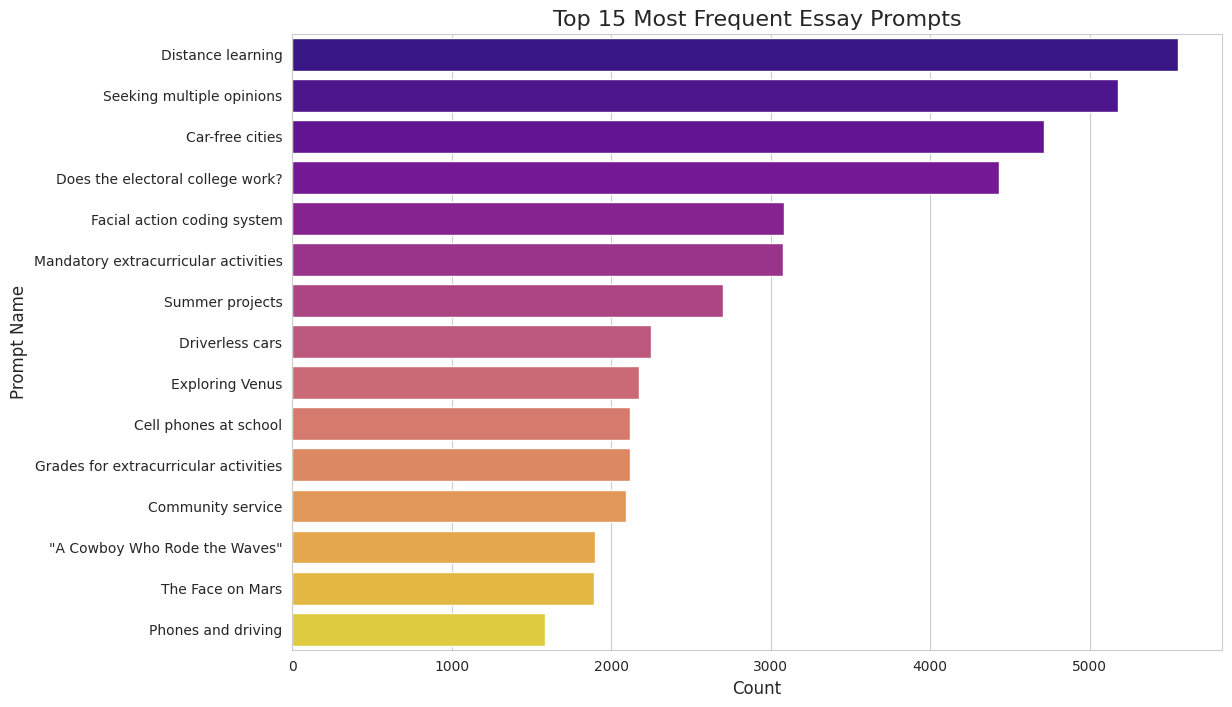


Total number of unique prompts: 15

Top 15 most frequent prompts:
prompt_name
Distance learning                        5554
Seeking multiple opinions                5176
Car-free cities                          4717
Does the electoral college work?         4434
Facial action coding system              3084
Mandatory extracurricular activities     3077
Summer projects                          2701
Driverless cars                          2250
Exploring Venus                          2176
Cell phones at school                    2119
Grades for extracurricular activities    2116
Community service                        2092
"A Cowboy Who Rode the Waves"            1896
The Face on Mars                         1893
Phones and driving                       1583
Name: count, dtype: int64


In [5]:
if not df.empty:
    # Due to the large number of unique prompts, let's visualize the top 15
    top_n_prompts = 15
    prompt_counts = df['prompt_name'].value_counts()
    
    plt.figure(figsize=(12, 8))
    sns.barplot(y=prompt_counts.index[:top_n_prompts], x=prompt_counts.values[:top_n_prompts], orient='h', palette='plasma')
    
    plt.title(f'Top {top_n_prompts} Most Frequent Essay Prompts', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Prompt Name', fontsize=12)
    plt.show()

    print(f"\nTotal number of unique prompts: {df['prompt_name'].nunique()}")
    print(f"\nTop {top_n_prompts} most frequent prompts:")
    print(prompt_counts.head(top_n_prompts))


- If a specific prompt_name (topic) is exclusively or heavily associated with only one label (AI or Human), the model might learn to use the topic as a shortcut for prediction.
- For example, if every essay about “Driverless cars” is AI-generated, your model might learn:

if text contains "driverless car", "autonomous vehicle", "self-driving" -> predict AI (1)

This model would fail spectacularly if it ever encountered a human-written essay on the same topic. Let’s systematically investigate this potential leakage.

--- Analyzing Label Distribution per Prompt Name ---

--- Distribution of AI vs. Human Labels within each Prompt ---
Prompts are sorted by the percentage of AI-generated essays (from highest to lowest).


label,human_count,ai_count,total_count,ai_percentage
prompt_name,,,,
Seeking multiple opinions,1552,3624,5176,70.015456
Distance learning,2157,3397,5554,61.163126
Mandatory extracurricular activities,1670,1407,3077,45.726357
Car-free cities,2666,2051,4717,43.481026
Does the electoral college work?,2714,1720,4434,38.791159
Summer projects,1750,951,2701,35.209182
Facial action coding system,2167,917,3084,29.734112
"""A Cowboy Who Rode the Waves""",1372,524,1896,27.637131
Community service,1542,550,2092,26.290631




--- Leakage Investigation Results ---
Total number of unique prompts: 15
Number of prompts that are 100% AI-generated: 0
Number of prompts that are 100% Human-written: 0
Total number of 'pure' (100% one label) or highly skewed (<5% or >95%) prompts: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


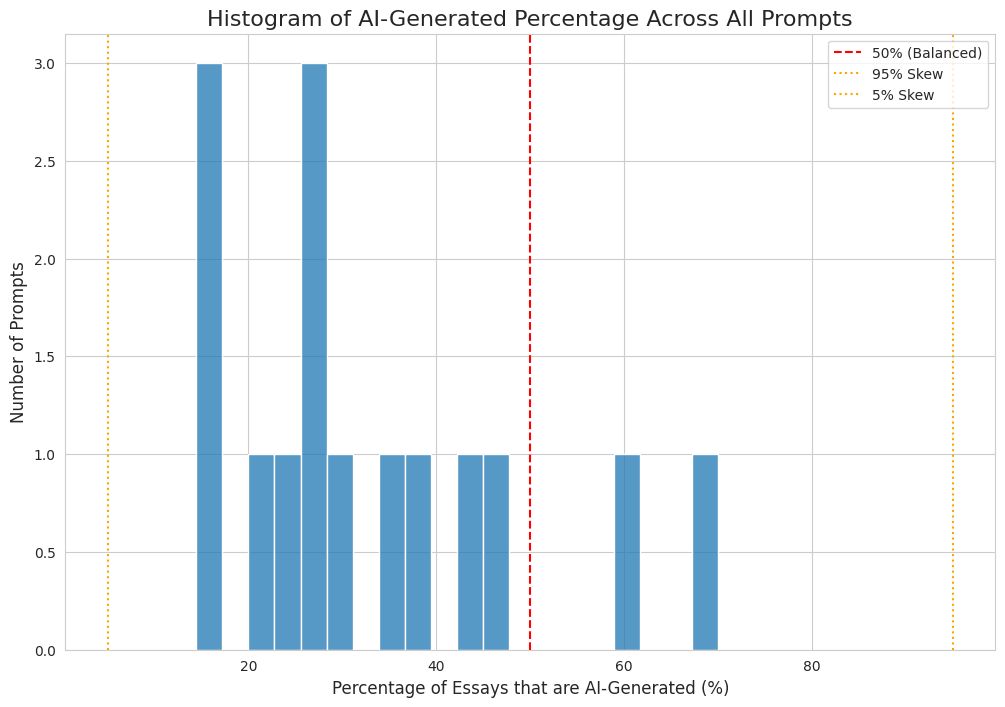

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We assume 'df' is already loaded from the previous steps
if not df.empty:
    print("--- Analyzing Label Distribution per Prompt Name ---")
    
    # fill_value=0 handles prompts that may only have one label type
    prompt_label_dist = df.groupby('prompt_name')['label'].value_counts().unstack(fill_value=0)
    
    # Rename columns for clarity
    prompt_label_dist = prompt_label_dist.rename(columns={0: 'human_count', 1: 'ai_count'})

    # Calculate the total count and the percentage of AI-generated essays for each prompt
    prompt_label_dist['total_count'] = prompt_label_dist['human_count'] + prompt_label_dist['ai_count']
    prompt_label_dist['ai_percentage'] = (prompt_label_dist['ai_count'] / prompt_label_dist['total_count']) * 100

    # Sort by the AI percentage to easily find the most skewed prompts
    prompt_label_dist_sorted = prompt_label_dist.sort_values(by='ai_percentage', ascending=False)

    print("\n--- Distribution of AI vs. Human Labels within each Prompt ---")
    print("Prompts are sorted by the percentage of AI-generated essays (from highest to lowest).")
    display(prompt_label_dist_sorted)

    # --- Identifying "Leaky" Prompts ---
    # Prompts that are 100% AI or 100% Human
    pure_ai_prompts = prompt_label_dist_sorted[prompt_label_dist_sorted['ai_percentage'] == 100]
    pure_human_prompts = prompt_label_dist_sorted[prompt_label_dist_sorted['ai_percentage'] == 0]

    # Prompts that are heavily skewed (e.g., > 95% AI or < 5% AI)
    highly_skewed_prompts = prompt_label_dist_sorted[
        (prompt_label_dist_sorted['ai_percentage'] > 95) | 
        (prompt_label_dist_sorted['ai_percentage'] < 5)
    ]

    print(f"\n\n--- Leakage Investigation Results ---")
    print(f"Total number of unique prompts: {len(prompt_label_dist)}")
    print(f"Number of prompts that are 100% AI-generated: {len(pure_ai_prompts)}")
    print(f"Number of prompts that are 100% Human-written: {len(pure_human_prompts)}")
    print(f"Total number of 'pure' (100% one label) or highly skewed (<5% or >95%) prompts: {len(highly_skewed_prompts)}")

    if len(pure_ai_prompts) > 0:
        print("\nPrompts that are 100% AI-Generated (High Risk of Leakage):")
        display(pure_ai_prompts.head()) # Display first few
    
    if len(pure_human_prompts) > 0:
        print("\nPrompts that are 100% Human-Written (High Risk of Leakage):")
        display(pure_human_prompts.head()) # Display first few

    # --- Visualization ---
    plt.figure(figsize=(12, 8))
    sns.histplot(prompt_label_dist['ai_percentage'], bins=20, kde=False)
    plt.title('Histogram of AI-Generated Percentage Across All Prompts', fontsize=16)
    plt.xlabel('Percentage of Essays that are AI-Generated (%)', fontsize=12)
    plt.ylabel('Number of Prompts', fontsize=12)
    plt.axvline(50, color='r', linestyle='--', label='50% (Balanced)')
    plt.axvline(95, color='orange', linestyle=':', label='95% Skew')
    plt.axvline(5, color='orange', linestyle=':', label='5% Skew')
    plt.legend()
    plt.show()


- for every prompt we listed, there is both ai-gen text and  human text.